In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

from math import sqrt

import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline


print('done')

done


## Qauntum channel Simulation



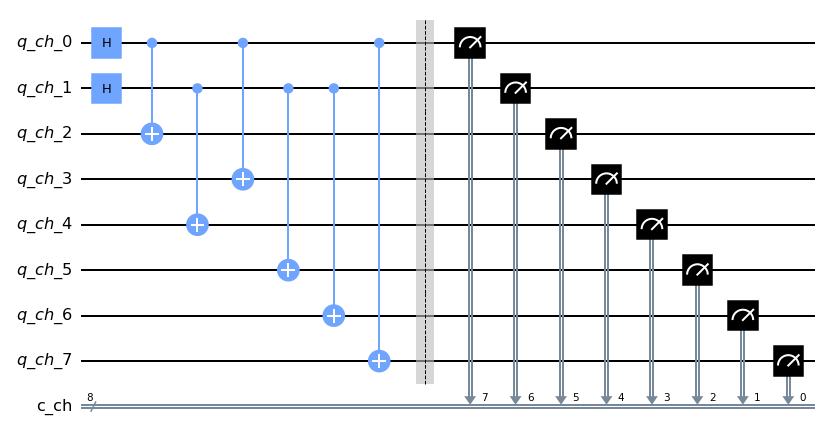

In [2]:

q_ch = QuantumRegister(8, 'q_ch')
c_ch = ClassicalRegister(8,'c_ch')

circ_ch = QuantumCircuit(q_ch,c_ch)

circ_ch.h(q_ch[0])
circ_ch.h(q_ch[1])

circ_ch.cx(q_ch[0],q_ch[2])
circ_ch.cx(q_ch[0],q_ch[3])
circ_ch.cx(q_ch[1],q_ch[4])
circ_ch.cx(q_ch[1],q_ch[5])
circ_ch.cx(q_ch[1],q_ch[6])
circ_ch.cx(q_ch[0],q_ch[7])

circ_ch.barrier(q_ch)

circ_ch.measure(q_ch[0],c_ch[7])
circ_ch.measure(q_ch[1],c_ch[6])
circ_ch.measure(q_ch[2],c_ch[5])
circ_ch.measure(q_ch[3],c_ch[4])
circ_ch.measure(q_ch[4],c_ch[3])
circ_ch.measure(q_ch[5],c_ch[2])
circ_ch.measure(q_ch[6],c_ch[1])
circ_ch.measure(q_ch[7],c_ch[0])

circ_ch.draw(output='mpl')

## Measurement result of $|\phi\rangle_{A_1B_1B_2B_3A_2A_3A_4C}$
CNOT gates operate on qubits ($𝐴_1$, $𝐵_2$), ($𝐴_1$, $𝐵_3$), ($𝐵_1$, $𝐴_2$), ($𝐵_1$, $𝐴_3$), ($𝐵_1$, $𝐴_4$) and ($𝐴_1$, $𝐶$), with $𝐴_1$ and $𝐵_1$ as control qubits and the remaining qubits as target qubits. As a result, the quantum channel is finally constructed which can be described as:

$|\phi\rangle_{A_1B_1B_2B_3A_2A_3A_4C}=\frac{1}{2}(|00000000\rangle+|01001110\rangle+|10110001\rangle+|11111111\rangle)$

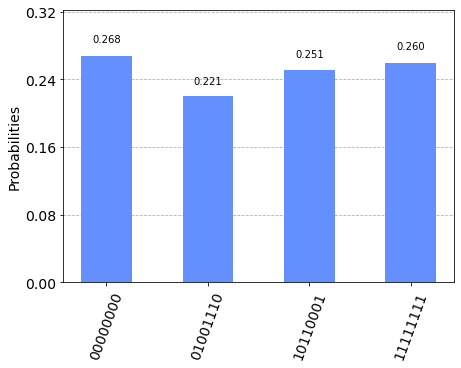

In [3]:
simulator = Aer.get_backend('aer_simulator')
circ_ch_sim = transpile(circ_ch, simulator)

# Run and get counts
result = simulator.run(circ_ch_sim, shots=1000).result()
counts_ch = result.get_counts(circ_ch_sim)

plot_histogram(counts_ch)

## Alice and Bob's initial qubits Simulation
Alice has an unknown two-qubit entangled state in
the following form:

$|\psi\rangle_{a_0a_1} = \alpha |00\rangle+\beta|11\rangle$

And Bob also has an unknown three-qubit pure state which
can be described as:

$|\psi\rangle_{b_1b_2b_3} = \gamma |000\rangle+\delta|111\rangle$

Alice inpute state: $|\phi_{a_1}\rangle = \cos{\theta_A}|0\rangle+\sin{\theta_A}|1\rangle$


Bob   inpute state: $|\phi_{b_1}\rangle = \cos{\theta_B}|0\rangle+\sin{\theta_B}|1\rangle$


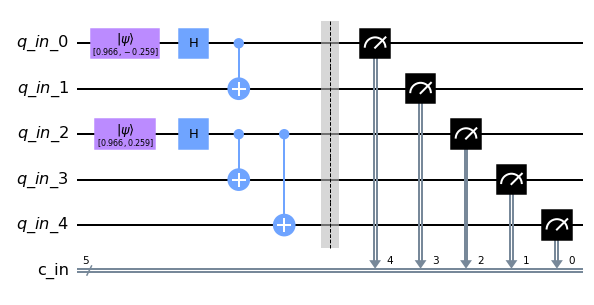

In [24]:

q_in = QuantumRegister(5, 'q_in')
c_in = ClassicalRegister(5,'c_in')

circ_in = QuantumCircuit(q_in,c_in)

theta_A = -np.pi/12
theta_B = np.pi/12


initial_state_A = [np.cos(theta_A),np.sin(theta_A)]
initial_state_B = [np.cos(theta_B),np.sin(theta_B)]

circ_in.initialize(initial_state_A,q_in[0])
circ_in.initialize(initial_state_B,q_in[2])


circ_in.h(q_in[0])
circ_in.h(q_in[2])

circ_in.cx(q_in[0],q_in[1])
circ_in.cx(q_in[2],q_in[3])
circ_in.cx(q_in[2],q_in[4])

circ_in.barrier(q_in)

circ_in.measure(q_in[0],c_in[4])
circ_in.measure(q_in[1],c_in[3])
circ_in.measure(q_in[2],c_in[2])
circ_in.measure(q_in[3],c_in[1])
circ_in.measure(q_in[4],c_in[0])


circ_in.draw(output='mpl')

In [25]:
simulator = Aer.get_backend('aer_simulator')
circ_in_sim = transpile(circ_in, simulator)

# Run and get counts
result = simulator.run(circ_in_sim, shots=1000).result()
counts_in = result.get_counts(circ_in_sim)
print('Done')

Done


## Measurement result of $|\psi\rangle_{a_0a_1}$
$|\psi\rangle_{a_0a_1} = \alpha |00\rangle+\beta|11\rangle$

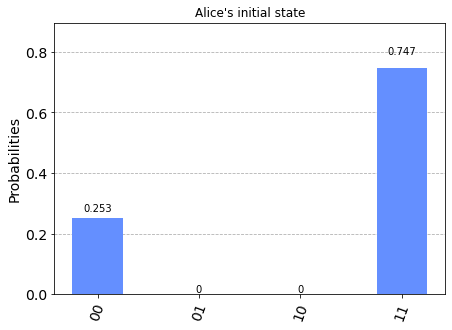

In [26]:
state_00 = 0
state_10 = 0
state_01 = 0
state_11 = 0
i=0

for state in counts_in:
    i=i+1
    if (state[0:2]=='00'):
        state_00 = state_00+counts_in[state]
    if (state[0:2]=='10'):
        state_10 = state_10+counts_in[state]
    if (state[0:2]=='01'):
        state_01 = state_01+counts_in[state]
    if (state[0:2]=='11'):
        state_11 = state_11+counts_in[state]

counts_in_alice = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}

plot_histogram(counts_in_alice,title='Alice\'s initial state')


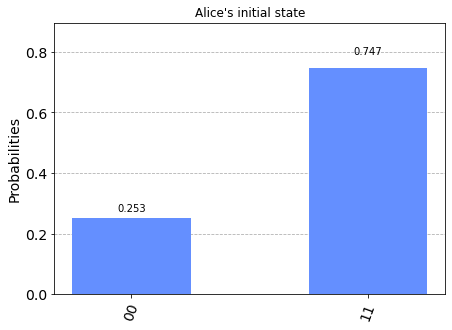

In [27]:
counts_in_alice = {'00':state_00,'11':state_11}

plot_histogram(counts_in_alice,title='Alice\'s initial state')

## Measurement result of $|\psi\rangle_{b_1b_2b_3}$
$|\psi\rangle_{b_1b_2b_3} = \gamma |000\rangle+\delta|111\rangle$

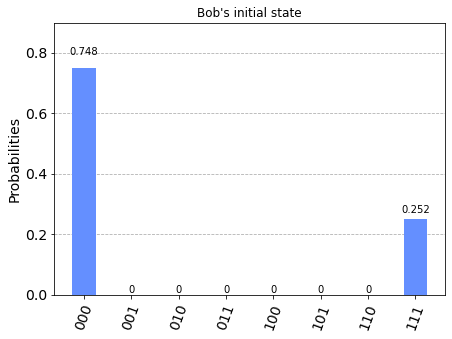

In [28]:
state_000 = 0
state_001 = 0
state_010 = 0
state_011 = 0
state_100 = 0
state_101 = 0
state_110 = 0
state_111 = 0

i=0

for state in counts_in:
    i=i+1
    if (state[2:5]=='000'):
        state_000 = state_000+counts_in[state]
    if (state[2:5]=='001'):
        state_001 = state_001+counts_in[state]
    if (state[2:5]=='010'):
        state_010 = state_010+counts_in[state]
    if (state[2:5]=='011'):
        state_011 = state_011+counts_in[state]
    if (state[2:5]=='100'):
        state_100 = state_100+counts_in[state]
    if (state[2:5]=='101'):
        state_101 = state_101+counts_in[state]
    if (state[2:5]=='110'):
        state_110 = state_110+counts_in[state]
    if (state[2:5]=='111'):
        state_111 = state_111+counts_in[state]

counts_in_bob = {'000':state_000,'001':state_001,'010':state_010,'011':state_011,
                 '100':state_100,'101':state_101,'110':state_110,'111':state_111}

plot_histogram(counts_in_bob,title='Bob\'s initial state')


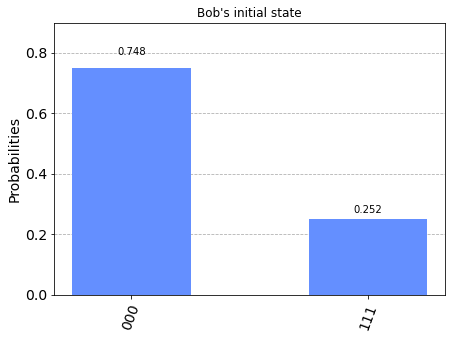

In [29]:
counts_in_bob = {'000':state_000,'111':state_111}

plot_histogram(counts_in_bob,title='Bob\'s initial state')


## Asymmetric Controlled Bidirectional Quantum Teleportation using Eight Qubit Cluster State

Alice inpute state: $|\phi_{a_1}\rangle = \cos{\theta_A}|0\rangle+\sin{\theta_A}|1\rangle$


Bob   inpute state: $|\phi_{b_1}\rangle = \cos{\theta_B}|0\rangle+\sin{\theta_B}|1\rangle$

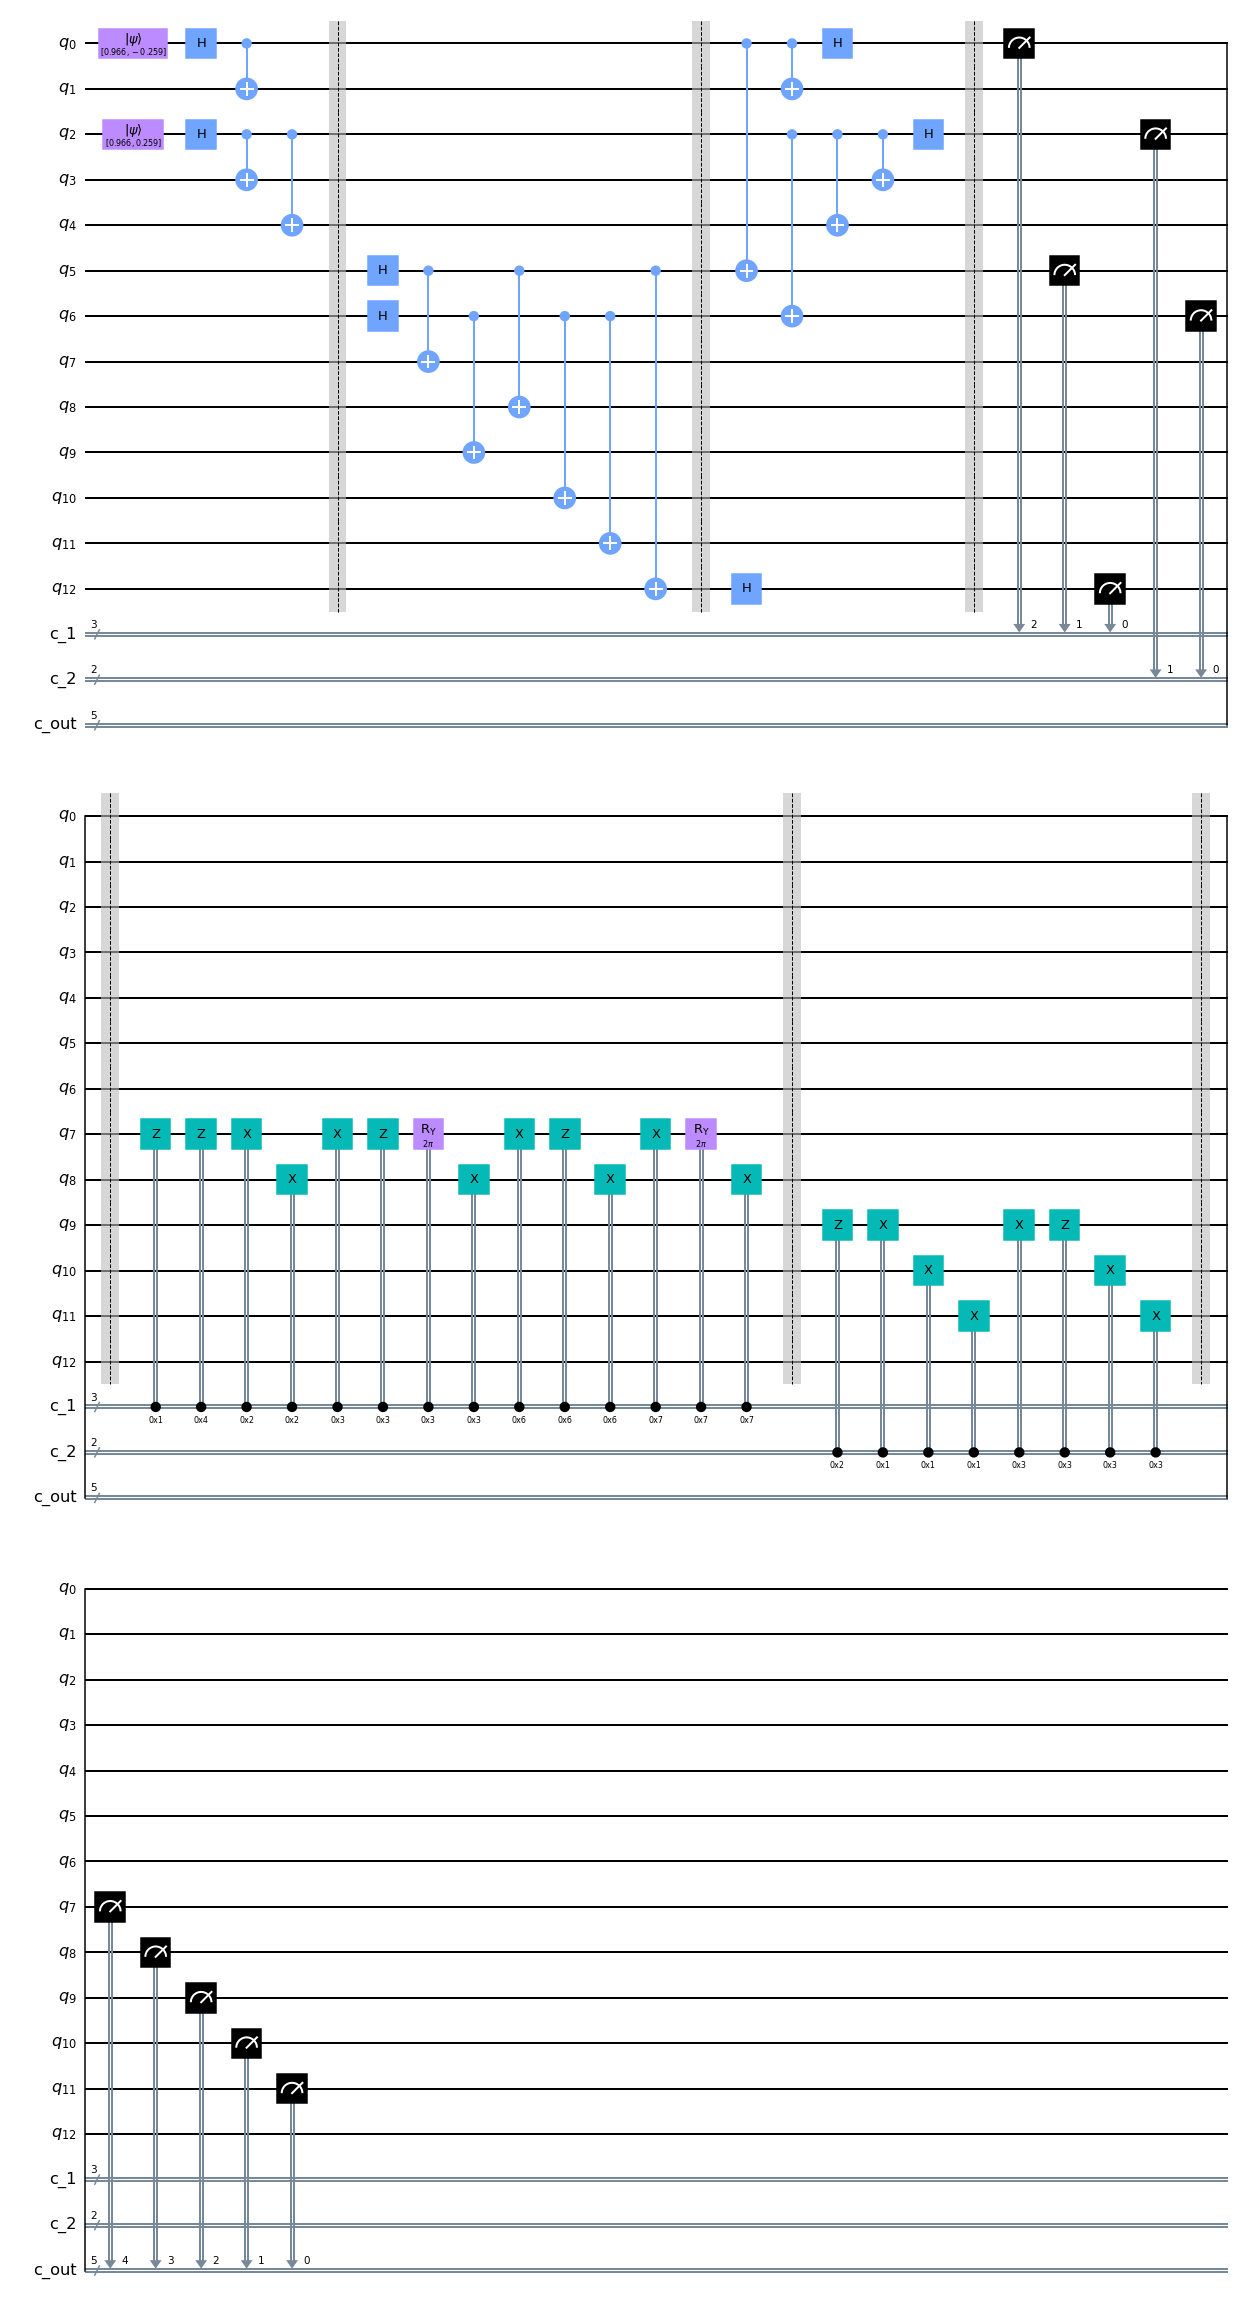

In [30]:

q = QuantumRegister(13, 'q')
c_step1 = ClassicalRegister(3,'c_1')
c_step2 = ClassicalRegister(2,'c_2')
c_out = ClassicalRegister(5,'c_out')


circ = QuantumCircuit(q,c_step1,c_step2,c_out)

theta_A = -np.pi/12   
theta_B = np.pi/12


initial_state_A = [np.cos(theta_A),np.sin(theta_A)]
initial_state_B = [np.cos(theta_B),np.sin(theta_B)]

circ.initialize(initial_state_A,q[0])
circ.initialize(initial_state_B,q[2])


circ.h(q[0])
circ.h(q[2])

circ.cx(q[0],q[1])
circ.cx(q[2],q[3])
circ.cx(q[2],q[4])

circ.barrier(q)
circ.h(q[5])
circ.h(q[6])

circ.cx(q[5],q[7])
circ.cx(q[5],q[8])
circ.cx(q[6],q[9])
circ.cx(q[6],q[10])
circ.cx(q[6],q[11])
circ.cx(q[5],q[12])

circ.barrier(q)

circ.cx(q[0],q[5])
circ.cx(q[0],q[1])
circ.h(q[0])

circ.h(q[12])

circ.cx(q[2],q[6])
circ.cx(q[2],q[4])
circ.cx(q[2],q[3])

circ.h(q[2])

circ.barrier(q)

circ.measure(q[0],c_step1[2])
circ.measure(q[5],c_step1[1])
circ.measure(q[12],c_step1[0])

circ.measure(q[2],c_step2[1])
circ.measure(q[6],c_step2[0])


circ.barrier(q)

# ZI
circ.z(q[7]).c_if(c_step1,1)
circ.z(q[7]).c_if(c_step1,4)

# XX
circ.x(q[7]).c_if(c_step1,2)
circ.x(q[8]).c_if(c_step1,2)

#-ZXX
circ.x(q[7]).c_if(c_step1,3)
circ.z(q[7]).c_if(c_step1,3)
circ.ry(2*np.pi,q[7]).c_if(c_step1,3)
circ.x(q[8]).c_if(c_step1,3)

#ZXX
circ.x(q[7]).c_if(c_step1,6)
circ.z(q[7]).c_if(c_step1,6)
circ.x(q[8]).c_if(c_step1,6)

#-XX
circ.x(q[7]).c_if(c_step1,7)
circ.ry(2*np.pi,q[7]).c_if(c_step1,7)
circ.x(q[8]).c_if(c_step1,7)

circ.barrier(q)

#ZII
circ.z(q[9]).c_if(c_step2,2)

#XXX
circ.x(q[9]).c_if(c_step2,1)
circ.x(q[10]).c_if(c_step2,1)
circ.x(q[11]).c_if(c_step2,1)

#ZXXX
circ.x(q[9]).c_if(c_step2,3)
circ.z(q[9]).c_if(c_step2,3)
circ.x(q[10]).c_if(c_step2,3)
circ.x(q[11]).c_if(c_step2,3)

circ.barrier(q)
circ.measure(q[7],c_out[4])
circ.measure(q[8],c_out[3])
circ.measure(q[9],c_out[2])
circ.measure(q[10],c_out[1])
circ.measure(q[11],c_out[0])

circ.draw(output='mpl')

In [31]:
simulator = Aer.get_backend('aer_simulator')
circ_sim = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ_sim, shots=1000).result()
counts = result.get_counts(circ_sim)
print('Done')

Done


## Measurement result of $|\phi\rangle_{B_2B_3}$

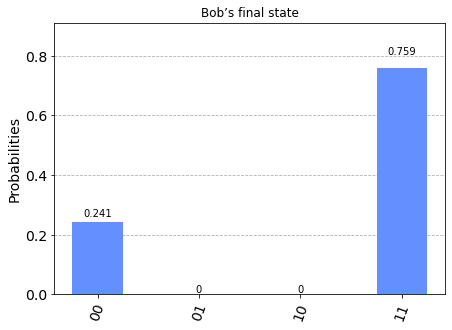

In [32]:
state_00 = 0
state_10 = 0
state_01 = 0
state_11 = 0
i=0

for state in counts:
    i=i+1
    if (state[0:2]=='00'):
        state_00 = state_00+counts[state]
    if (state[0:2]=='10'):
        state_10 = state_10+counts[state]
    if (state[0:2]=='01'):
        state_01 = state_01+counts[state]
    if (state[0:2]=='11'):
        state_11 = state_11+counts[state]

counts_out_bob = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}

plot_histogram(counts_out_bob,title='Bob’s final state')


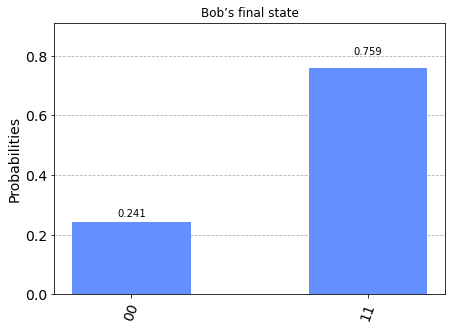

In [33]:
counts_out_bob = {'00':state_00,'11':state_11}

plot_histogram(counts_out_bob,title='Bob’s final state')


## Measurement result of $|\phi\rangle_{A_2A_3A_4}$

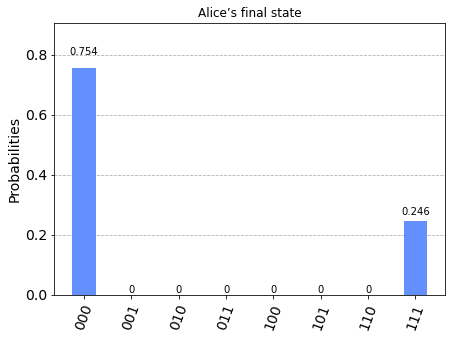

In [34]:
state_000 = 0
state_001 = 0
state_010 = 0
state_011 = 0
state_100 = 0
state_101 = 0
state_110 = 0
state_111 = 0

i=0

for state in counts:
    i=i+1
    if (state[2:5]=='000'):
        state_000 = state_000+counts[state]
    if (state[2:5]=='001'):
        state_001 = state_001+counts[state]
    if (state[2:5]=='010'):
        state_010 = state_010+counts[state]
    if (state[2:5]=='011'):
        state_011 = state_011+counts[state]
    if (state[2:5]=='100'):
        state_100 = state_100+counts[state]
    if (state[2:5]=='101'):
        state_101 = state_101+counts[state]
    if (state[2:5]=='110'):
        state_110 = state_110+counts[state]
    if (state[2:5]=='111'):
        state_111 = state_111+counts[state]

counts_out_alice = {'000':state_000,'001':state_001,'010':state_010,'011':state_011,
                 '100':state_100,'101':state_101,'110':state_110,'111':state_111}

plot_histogram(counts_out_alice,title='Alice’s final state')


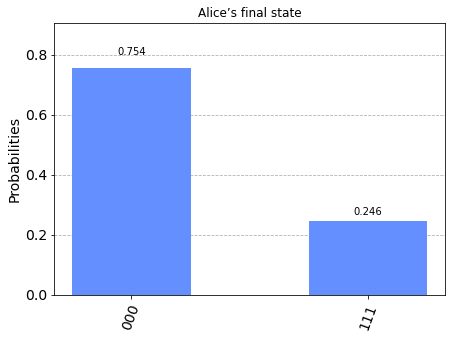

In [35]:
counts_out_alice = {'000':state_000,'111':state_111}

plot_histogram(counts_out_alice,title='Alice’s final state')